In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
smote = SMOTE()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("creditcard.csv")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

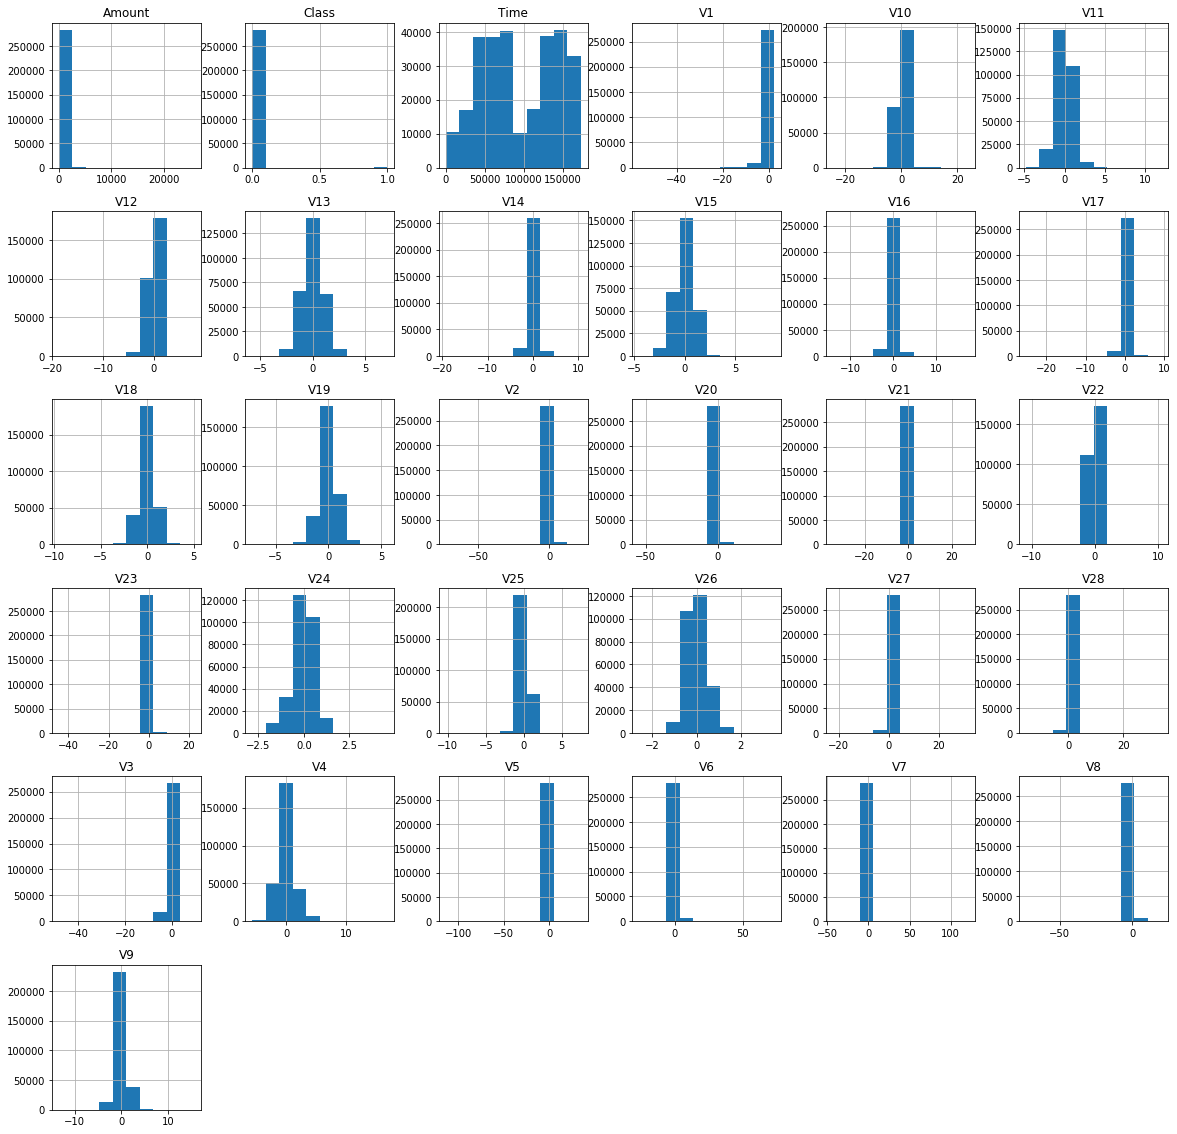

In [17]:
#plt.figure(figsize=(20,20)
df.hist(figsize=(20,20))
plt.show()

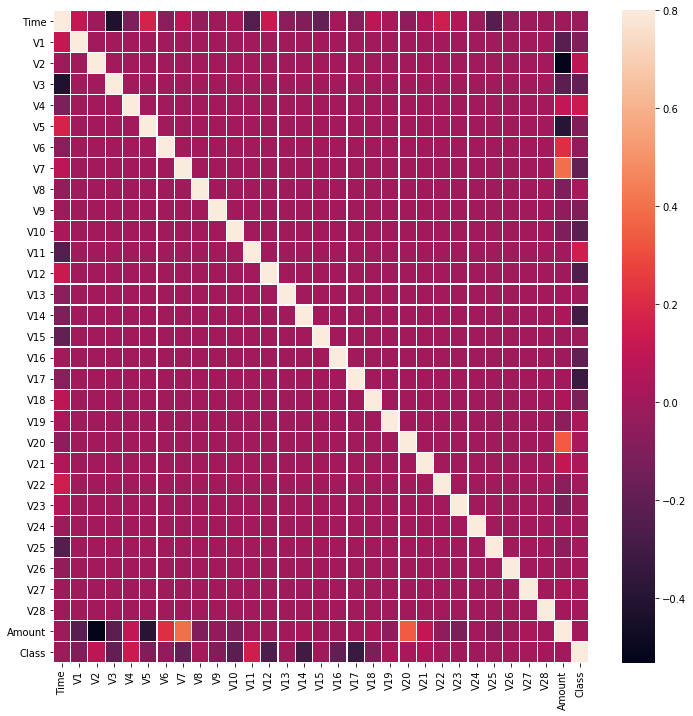

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),vmax=0.8,linewidths=0.2)

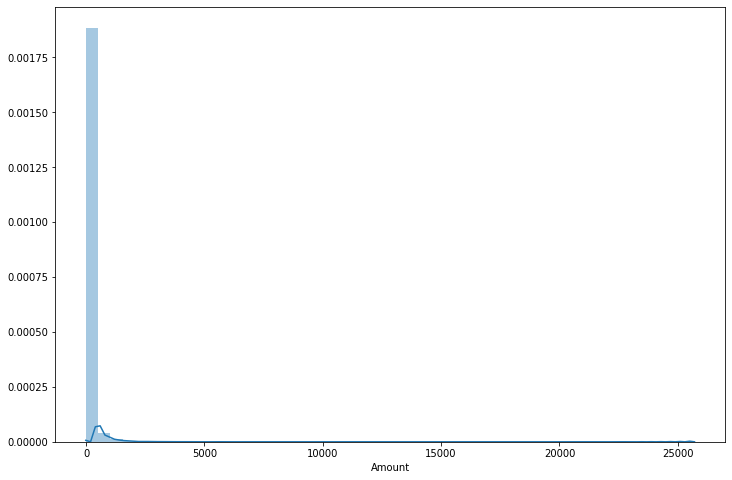

In [22]:
plt.figure(figsize=(12,8))
sns.distplot(df['Amount'])

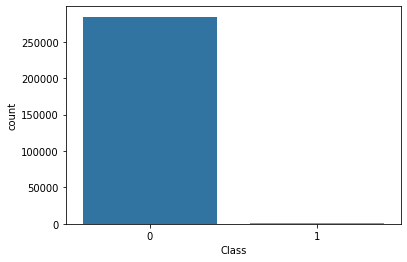

In [23]:
sns.countplot(x=df['Class'],data=df)

In [26]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [51]:
timedelta = pd.to_timedelta(df['Time'],unit='s')
df['min'] = timedelta.dt.components.minutes.astype(int)
df['hr'] = timedelta.dt.components.hours.astype(int)
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,min,hr
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0


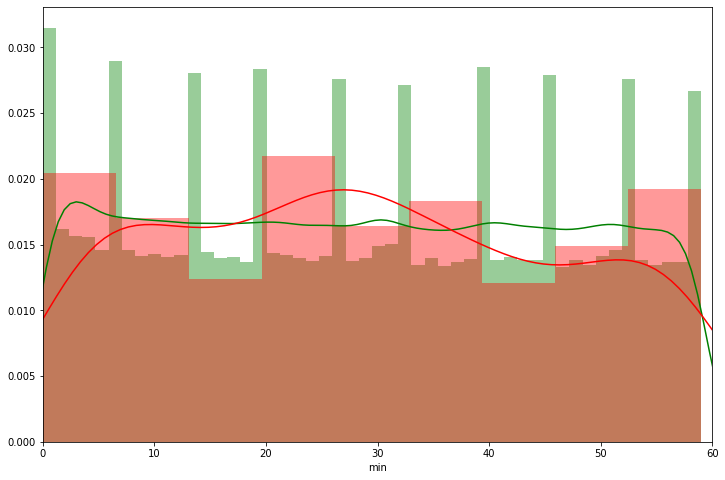

In [46]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Class']==0]['min'],color='g')
sns.distplot(df[df['Class']==1]['min'],color='r')
plt.xlim([0,60])
plt.show()

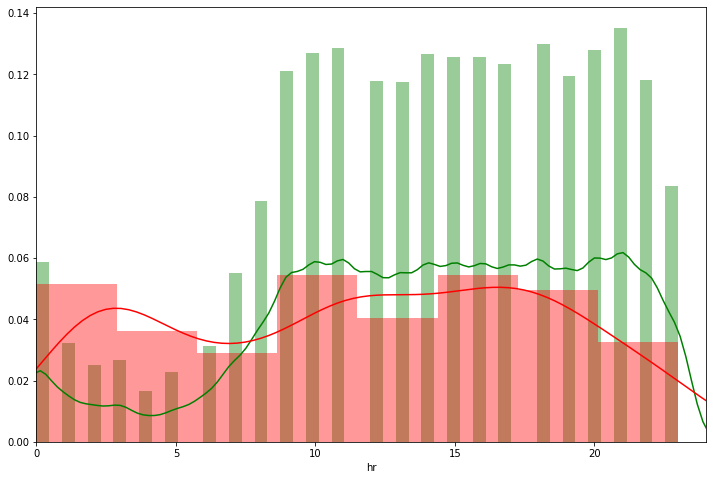

In [52]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Class']==0]['hr'],color='g')
sns.distplot(df[df['Class']==1]['hr'],color='r')
plt.xlim([0,24])
plt.show()

In [49]:
#df = df.drop(columns=['time_delta'])
df_fraud = df[df['Class']==1]
df_valid = df[df['Class']==0]
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,min
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0


In [53]:
df_fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [54]:
df_valid['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

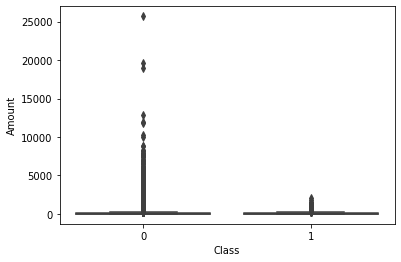

In [56]:
sns.boxplot(x='Class',y="Amount",data=df)

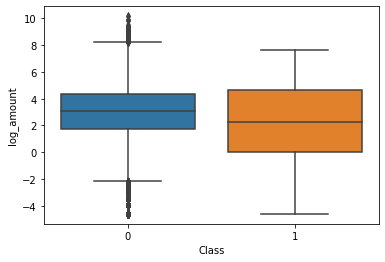

In [57]:
df['log_amount'] = np.log(df['Amount'] + 0.01)
sns.boxplot(x='Class',y='log_amount',data=df)

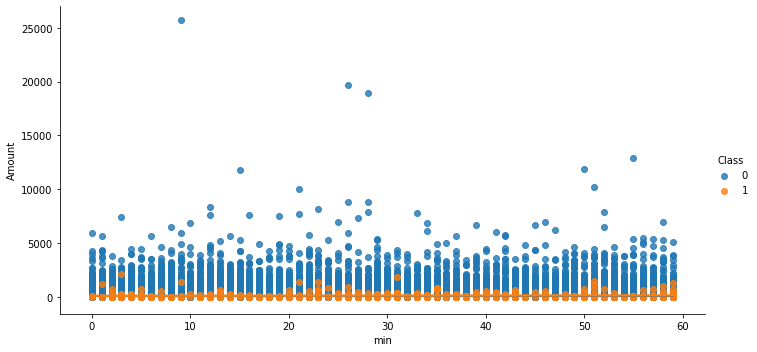

In [65]:
sns.lmplot(x='min',y='Amount',data=df,hue='Class',aspect=2)
plt.show()

In [78]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [117]:
X = df.drop(columns=['Class'],axis=1).values
Y = df['Class'].values

In [83]:
from collections import Counter
from sklearn.metrics import accuracy_score,recall_score,precision_score,precision_recall_curve

In [118]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.8,random_state=1)

In [119]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((56961, 33), (227846, 33), (56961,), (227846,))

In [144]:
smote_pipeline = imb_make_pipeline(SMOTE(random_state=4),RandomForestClassifier(random_state=1))
model = smote_pipeline.fit(X_train,Y_train)
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
prediction1 = model.predict(X_test)
Counter(prediction1)

Counter({0: 227488, 1: 358})

In [122]:
Counter(Y)

Counter({0: 284315, 1: 492})

In [123]:
sm = SMOTE(random_state =1)
smote_X,smote_Y = sm.fit_sample(X,Y)

In [124]:
Counter(smote_Y)

Counter({0: 284315, 1: 284315})

In [136]:
print("Confusion matrix:")
confusion_matrix(Y_test,prediction1)

Confusion matrix:


array([[227401,     47],
       [    87,    311]], dtype=int64)

In [126]:
print("Randomforestclassifier")
print(classification_report(Y_test,prediction1))

Randomforestclassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227448
           1       0.87      0.78      0.82       398

    accuracy                           1.00    227846
   macro avg       0.93      0.89      0.91    227846
weighted avg       1.00      1.00      1.00    227846



In [185]:
print("accuracy: {}".format(accuracy_score(Y_test, prediction1)))
print("precision: {}".format(precision_score(Y_test, prediction1)))
print("recall: {}".format(recall_score(Y_test, prediction1)))

accuracy: 0.9994118834651475
precision: 0.8687150837988827
recall: 0.7814070351758794


In [131]:
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_prob)

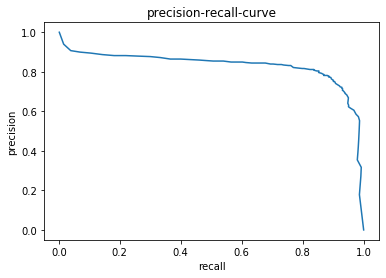

In [137]:
plt.plot(precision,recall)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision-recall-curve')
plt.show()

In [142]:
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

In [145]:
param_grid = {
    'n_estimators':[3,5,10],
    'max_depth':[3,5,None],
    'max_features':[5,6,7,'auto']
}

In [151]:
X_train_smote,Y_train_smote = sm.fit_sample(X_train,Y_train)
Counter(Y_train_smote)
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )

In [152]:
grid_search = GridSearchCV(model,param_grid=param_grid,cv=5,scoring='recall')
grid_search.fit(X_train_smote,Y_train_smote)
grid_search.best_params_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Us

{'max_depth': None, 'max_features': 7, 'n_estimators': 5}

In [156]:
rfc = RandomForestClassifier(random_state=1,n_estimators=5,max_depth=None,max_features=7)
rfc.fit(X_train_smote,Y_train_smote)
prediction2 = rfc.predict(X_test)

In [157]:
confusion_matrix(Y_test,prediction2)

array([[227367,     81],
       [    86,    312]], dtype=int64)

In [159]:
print(classification_report(Y_test,prediction2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227448
           1       0.79      0.78      0.79       398

    accuracy                           1.00    227846
   macro avg       0.90      0.89      0.89    227846
weighted avg       1.00      1.00      1.00    227846



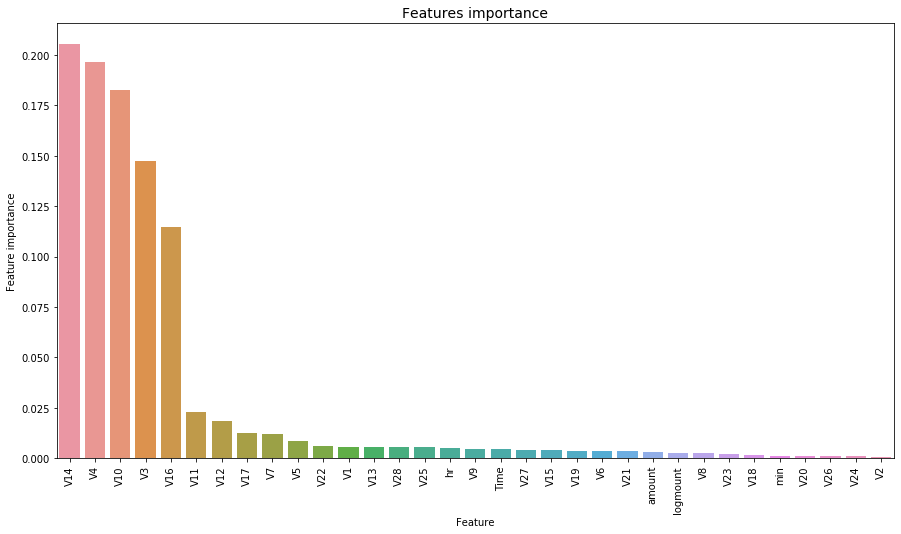

In [189]:
predictors = ['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'amount','min','hr','logmount']
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': rfc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (15,8))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()
#rfc.feature_importances_

In [161]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]
precision,recall,threshold = precision_recall_curve(Y_test,y_pred_prob)

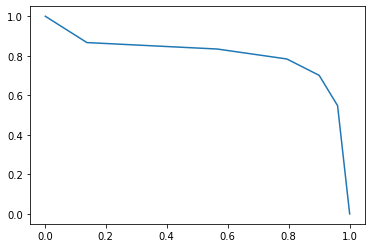

In [162]:
plt.plot(precision,recall)

In [166]:
cross_val = cross_val_score(rfc,X_train_smote,Y_train_smote,cv=5,scoring='recall')
cross_val.mean()

0.9999296579618395

In [184]:
print("accuracy: {}".format(accuracy_score(Y_test, prediction2)))
print("precision: {}".format(precision_score(Y_test, prediction2)))
print("recall: {}".format(recall_score(Y_test, prediction2)))

accuracy: 0.9992670487961167
precision: 0.7938931297709924
recall: 0.7839195979899497


In [165]:
#logisticregression is used for classification
from sklearn.linear_model import LogisticRegression

In [167]:
lr = LogisticRegression(random_state=1)

In [170]:
param_grid = {
    'C':[0.1,1,2,10],
    'penalty':['l1','l2']
}
lr_grid = GridSearchCV(lr,param_grid=param_grid,cv=5,scoring='recall')
lr_grid.fit(X_train_smote,Y_train_smote)

C:\Users\NIHAD\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\NIHAD\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NIHAD\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\NIHAD\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\NIHAD\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO.

C:\Users\NIHAD\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\NIHAD\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\NIHAD\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NIHAD\anaconda\lib\site-packages\

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1),
             param_grid={'C': [0.1, 1, 2, 10], 'penalty': ['l1', 'l2']},
             scoring='recall')

In [171]:
lr_grid.best_params_

{'C': 2, 'penalty': 'l2'}

In [174]:
lr = LogisticRegression(C=2,penalty='l2',random_state=1)
lr.fit(X_train_smote,Y_train_smote)

C:\Users\NIHAD\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=2, random_state=1)

In [175]:
prediction3 = lr.predict(X_test)

In [176]:
confusion_matrix(Y_test,prediction3)

array([[223504,   3944],
       [    51,    347]], dtype=int64)

In [179]:
print(classification_report(Y_test,prediction3))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227448
           1       0.08      0.87      0.15       398

    accuracy                           0.98    227846
   macro avg       0.54      0.93      0.57    227846
weighted avg       1.00      0.98      0.99    227846



In [180]:
y_pred_prob = lr.predict_proba(X_test)[:,1]
precision,recall,threshold = precision_recall_curve(Y_test,y_pred_prob)

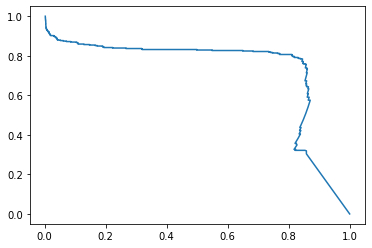

In [181]:
plt.plot(precision,recall)

In [183]:
print("accuracy: {}".format(accuracy_score(Y_test, prediction3)))
print("precision: {}".format(precision_score(Y_test, prediction3)))
print("recall: {}".format(recall_score(Y_test, prediction3)))

accuracy: 0.9824662271885396
precision: 0.08086693078536472
recall: 0.871859296482412


In [187]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,min,hr,log_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,4.248495
